In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16, EfficientNetB0, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import scipy
from scipy.io import loadmat
import numpy as np

import matplotlib.pyplot as plt


tf.random.set_seed(123)

import warnings
warnings.filterwarnings("ignore")

In [3]:
img_size = (224, 224)
batch_size = 32
epochs = 50
learning_rate = 1e-4

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased from 20
    width_shift_range=0.3,  # Increased from 0.2
    height_shift_range=0.3,  # Increased from 0.2
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)
gen_train_data = train_datagen.flow_from_directory(
    "/Users/tirthpatel/Desktop/DL/xray_dataset_covid19/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
gen_test_data = test_datagen.flow_from_directory(
    "/Users/tirthpatel/Desktop/DL/xray_dataset_covid19/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


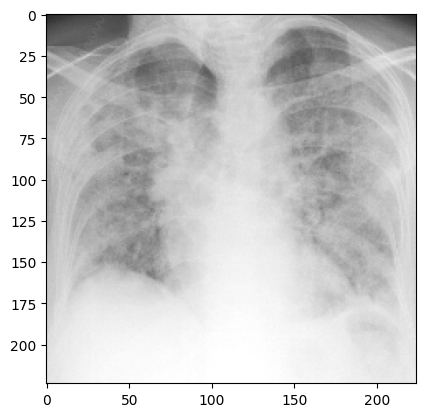

In [5]:
# plt.imshow(list(gen_train_data)[0][0][0].numpy().astype('uint8'))
plt.imshow(gen_test_data[0][0][0], cmap="gray")

In [6]:
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=img_size+(3,))

for layer in base_model.layers:
    layer.trainable = False

2024-02-26 16:29:14.134735: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-26 16:29:14.134761: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-26 16:29:14.134828: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-26 16:29:14.135025: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-26 16:29:14.135886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
checkpoint = ModelCheckpoint(
    filepath='best_model1.h5',
    monitor='val_loss',
    save_best_only=True
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [11]:
history = model.fit(gen_train_data, epochs=epochs, validation_data=gen_test_data, callbacks=[checkpoint, early_stopping], verbose=1)

Epoch 1/50


2024-02-26 16:29:17.452199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 0.6973 - accuracy: 0.5811

INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 12s 2s/step - loss: 0.6973 - accuracy: 0.5811 - val_loss: 0.5804 - val_accuracy: 0.7000
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.5592 - accuracy: 0.7297

INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 10s 2s/step - loss: 0.5592 - accuracy: 0.7297 - val_loss: 0.4562 - val_accuracy: 0.8750
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.4824 - accuracy: 0.8108INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 10s 2s/step - loss: 0.4824 - accuracy: 0.8108 - val_loss: 0.3756 - val_accuracy: 0.9250
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.4298 - accuracy: 0.8311INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 10s 2s/step - loss: 0.4298 - accuracy: 0.8311 - val_loss: 0.3173 - val_accuracy: 0.9250
Epoch 5/50
5/5 [==============================] - ETA: 0s - loss: 0.3783 - accuracy: 0.8784INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 9s 2s/step - loss: 0.3783 - accuracy: 0.8784 - val_loss: 0.2792 - val_accuracy: 0.9500
Epoch 6/50
5/5 [==============================] - ETA: 0s - loss: 0.3800 - accuracy: 0.8311INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 9s 2s/step - loss: 0.3800 - accuracy: 0.8311 - val_loss: 0.2547 - val_accuracy: 0.9250
Epoch 7/50
5/5 [==============================] - ETA: 0s - loss: 0.3158 - accuracy: 0.9054INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 9s 2s/step - loss: 0.3158 - accuracy: 0.9054 - val_loss: 0.2419 - val_accuracy: 0.9250
Epoch 8/50
5/5 [==============================] - ETA: 0s - loss: 0.2728 - accuracy: 0.9189INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 9s 2s/step - loss: 0.2728 - accuracy: 0.9189 - val_loss: 0.2260 - val_accuracy: 0.9250
Epoch 9/50
5/5 [==============================] - ETA: 0s - loss: 0.2704 - accuracy: 0.9257INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 9s 2s/step - loss: 0.2704 - accuracy: 0.9257 - val_loss: 0.2153 - val_accuracy: 0.9250
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.2636 - accuracy: 0.9054INFO:tensorflow:Assets written to: best_model1.pkl/assets


INFO:tensorflow:Assets written to: best_model1.pkl/assets


5/5 [==============================] - 9s 2s/step - loss: 0.2636 - accuracy: 0.9054 - val_loss: 0.2052 - val_accuracy: 0.9250
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.2617 - accuracy: 0.8851

KeyboardInterrupt: 

In [ ]:
loss, acc = model.evaluate(gen_train_data)
print(f'On Training data :- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')
loss, acc = model.evaluate(gen_test_data)
print(f'On Testing data :- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')

5/5 [==============================] - 5s 1s/step - loss: 0.1221 - accuracy: 0.9459
On Training data :- Loss: 0.122, Accuracy: 94.595%
2/2 [==============================] - 1s 51ms/step - loss: 0.1939 - accuracy: 0.9250
On Testing data :- Loss: 0.194, Accuracy: 92.5%


In [ ]:
def ploty(history):
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['loss', 'val_loss'])
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['accuracy', 'val_accuracy'])

    plt.show()

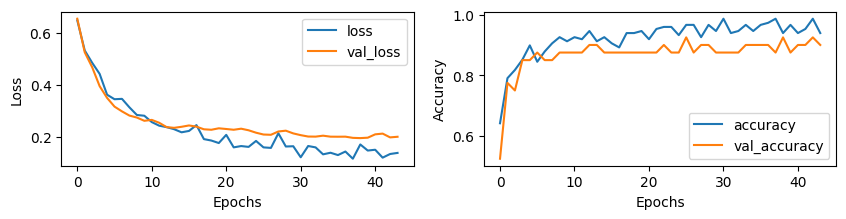

In [ ]:
ploty(history)

In [ ]:
base_model1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model2 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model3 = VGG16(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model4 = ResNet50(weights='imagenet', include_top=False, input_shape=img_size + (3,))
base_model5 = DenseNet121(weights='imagenet', include_top=False, input_shape=img_size + (3,))
all_base_models = [base_model1, base_model2, base_model3, base_model4, base_model5]
model_names = ['MobileNetV2', 'EfficientNetB0', 'VGG16', 'ResNet50', 'DenseNet121']

Training MobileNetV2


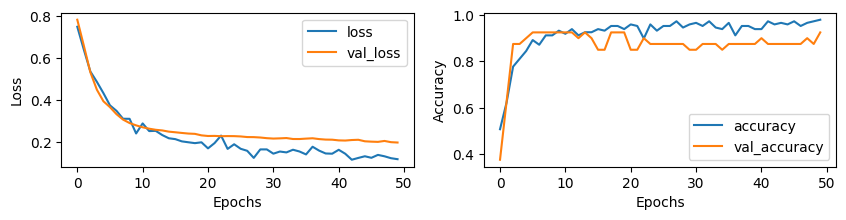

On TrainData --- Loss: 0.118, Accuracy: 97.973%
On TestData --- Loss: 0.196, Accuracy: 92.5%
**************************************************
Training EfficientNetB0


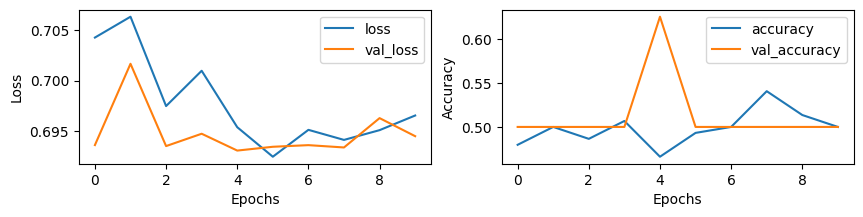

On TrainData --- Loss: 0.693, Accuracy: 47.973%
On TestData --- Loss: 0.693, Accuracy: 62.5%
**************************************************
Training VGG16


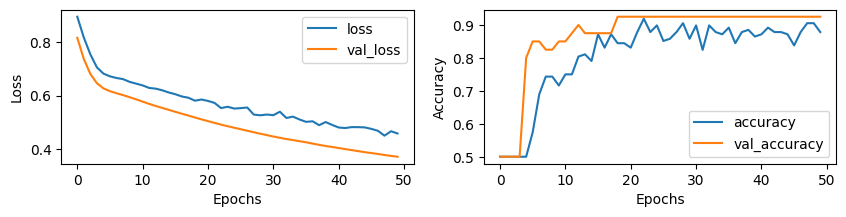

On TrainData --- Loss: 0.472, Accuracy: 87.838%
On TestData --- Loss: 0.371, Accuracy: 92.5%
**************************************************
Training ResNet50


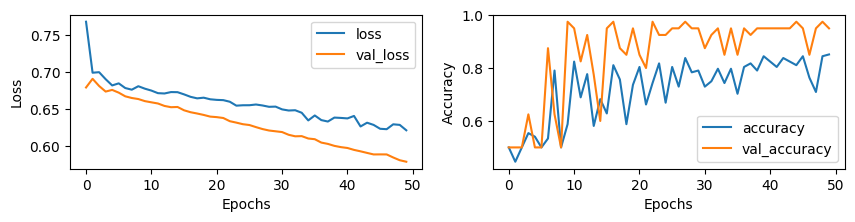

On TrainData --- Loss: 0.615, Accuracy: 86.486%
On TestData --- Loss: 0.578, Accuracy: 95.0%
**************************************************
Training DenseNet121


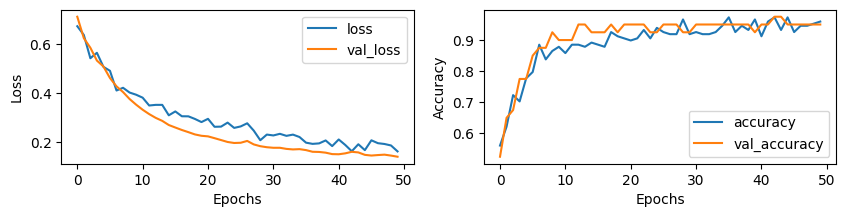

On TrainData --- Loss: 0.175, Accuracy: 94.595%
On TestData --- Loss: 0.14, Accuracy: 95.0%
**************************************************


In [ ]:
for base_model in all_base_models:
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(f'Training {model_names[all_base_models.index(base_model)]}')
    history = model.fit(gen_train_data, epochs=epochs, validation_data=gen_test_data, callbacks=[checkpoint, early_stopping], verbose=0)
    ploty(history)
    loss, acc = model.evaluate(gen_train_data, verbose=0)
    print(f'On TrainData --- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')
    loss, acc = model.evaluate(gen_test_data, verbose=0)
    print(f'On TestData --- Loss: {round(loss,3)}, Accuracy: {round(100*acc,3)}%')
    print('*'*50)